In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing dataset

import_df = pd.read_csv(r'D:\Prot\Data Analyst\UM selected projects\A_Employee Salaries\Employee_Salaries_cleaned.csv')

In [3]:
# Creating copy of the original dataframe

employee_pay_df = import_df.copy()

In [4]:
# Querying for 1st 5 rows

employee_pay_df[:5]

,Employee_Name,Job_Title,Base_Pay,Overtime_Pay,Other_Pay,Total_Pay_Without_Benefits,Benefits,Total_Pay_Benefits,Year,Total_Extra_Pay
0,Zykeill J Council,Public Service Trainee,35.00,0.0,0.0,35.00,0.35,35.35,2017,0.0
1,Zuzanna E Czerw,Publ Svc Aide-Asst To Prof,3558.46,0.0,0.0,3558.46,35.58,3594.04,2017,0.0
2,Zuzanna E Czerw,Publ Svc Aide-Asst To Prof,3298.78,0.0,0.0,3298.78,32.99,3331.77,2018,0.0
3,Zuri S Chavarin Cerda,Public Service Trainee,5857.19,0.0,0.0,5857.19,84.46,5941.65,2017,0.0
4,Zuri Jones,Deputy Probation Officer,70888.04,0.0,0.0,70888.04,0.00,70888.04,2011,0.0


In [5]:
# Querying for missing values

employee_pay_df.isnull().sum()

Employee_Name                 0
Job_Title                     0
Base_Pay                      0
Overtime_Pay                  0
Other_Pay                     0
Total_Pay_Without_Benefits    0
Benefits                      0
Total_Pay_Benefits            0
Year                          0
Total_Extra_Pay               0
dtype: int64

In [6]:
# Summary of the dataset

employee_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312810 entries, 0 to 312809
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Employee_Name               312810 non-null  object 
 1   Job_Title                   312810 non-null  object 
 2   Base_Pay                    312810 non-null  float64
 3   Overtime_Pay                312810 non-null  float64
 4   Other_Pay                   312810 non-null  float64
 5   Total_Pay_Without_Benefits  312810 non-null  float64
 6   Benefits                    312810 non-null  float64
 7   Total_Pay_Benefits          312810 non-null  float64
 8   Year                        312810 non-null  int64  
 9   Total_Extra_Pay             312810 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 23.9+ MB


In [7]:
# Analysing total number of rows and columns

employee_pay_df.shape

(312810, 10)

In [8]:
# Checking for duplicate values

employee_pay_df[employee_pay_df.duplicated()]

,Employee_Name,Job_Title,Base_Pay,Overtime_Pay,Other_Pay,Total_Pay_Without_Benefits,Benefits,Total_Pay_Benefits,Year,Total_Extra_Pay


* No duplicate values present.

In [10]:
# Statistical summary

employee_pay_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee_Name,312810,90008,Kevin Lee,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job_Title,312810,1754,Transit Operator,20382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Base_Pay,312810.0,NaN,NaN,NaN,69688.290968,45430.259402,-166.01,35384.6875,67651.015,99255.4325,592394.34
Overtime_Pay,312810.0,NaN,NaN,NaN,5670.217033,12746.815093,-0.01,0.0,0.0,5225.47,309481.03
Other_Pay,312810.0,NaN,NaN,NaN,3461.505993,7387.894585,-49.36,0.0,728.58,3958.68,400184.25
Total_Pay_Without_Benefits,312810.0,NaN,NaN,NaN,78820.013994,53224.092591,0.0,38843.865,74920.125,111397.705,592394.34
Benefits,312810.0,NaN,NaN,NaN,22130.528056,16287.70957,-13939.42,2088.0025,26773.54,34290.775,125891.73
Total_Pay_Benefits,312810.0,NaN,NaN,NaN,100950.54205,66475.998069,0.01,49020.2975,100027.795,142388.3025,712802.36
Year,312810.0,NaN,NaN,NaN,2014.625095,2.290915,2011.0,2013.0,2015.0,2017.0,2018.0
Total_Extra_Pay,312810.0,NaN,NaN,NaN,9131.723026,16675.592983,0.0,0.0,1743.415,11059.805,400184.25


* There are 90014 unique employees.
* There are 1754 unique job titles.

In [12]:
# Number of employees per year

employee_pay_df['Year'].value_counts()

Year
2018    42288
2017    41559
2016    40963
2015    39382
2014    38095
2013    37601
2012    36766
2011    36156
Name: count, dtype: int64

In [13]:
# Updating the table by filtering where Total_Pay_Benefits <= 0

employee_pay_df = employee_pay_df[employee_pay_df['Total_Pay_Benefits'] > 0]

#### Pay Benefits Distribution

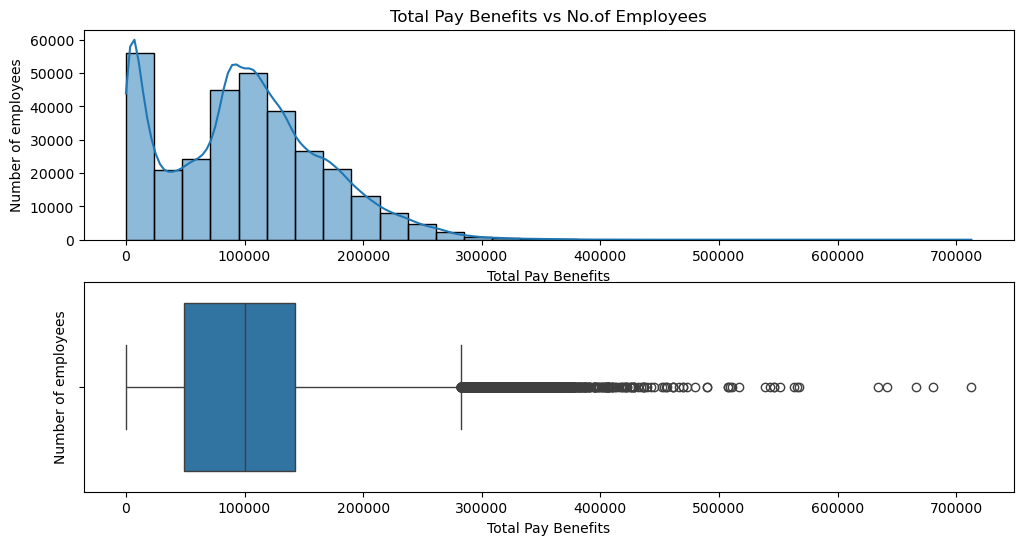

In [15]:
# Analysing the pay benefits distribution

plt.figure(figsize = (12,6))

plt.subplot(2,1,1)

sns.histplot(x='Total_Pay_Benefits',data = employee_pay_df,kde = True,bins = 30)
plt.title('Total Pay Benefits vs No.of Employees')
plt.xlabel('Total Pay Benefits')
plt.ylabel('Number of employees')


plt.subplot(2,1,2)

sns.boxplot(x='Total_Pay_Benefits',data = employee_pay_df)
plt.xlabel('Total Pay Benefits')
plt.ylabel('Number of employees')
plt.show()

#### Range of Pay Benefits

In [17]:
# Analysing the range of total pay benefits

Q1 = employee_pay_df['Total_Pay_Benefits'].quantile(.25)
Q3 = employee_pay_df['Total_Pay_Benefits'].quantile(.75)

IQR = Q3-Q1

lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

print('1st Quartile :',Q1)
print('3rd Quartile :',Q3)
print('Inter Quartile Range :',IQR)
print('Lower limit :',lower_limit)
print('Upper limit :',upper_limit)

1st Quartile : 49020.2975
3rd Quartile : 142388.3025
Inter Quartile Range : 93368.00499999999
Lower limit : -91031.70999999998
Upper limit : 282440.30999999994


In [18]:
# Analysing median earning employees

median_earning_employees = employee_pay_df[(employee_pay_df['Total_Pay_Benefits'] >= Q1) & (employee_pay_df['Total_Pay_Benefits'] <= upper_limit)]\
                                            .sort_values(by = 'Total_Pay_Benefits', ascending = False )
median_earning_employees

,Employee_Name,Job_Title,Base_Pay,Overtime_Pay,Other_Pay,Total_Pay_Without_Benefits,Benefits,Total_Pay_Benefits,Year,Total_Extra_Pay
7989,William M Roualdes,Captain 3,196763.02,1217.94,26341.07,224322.03,58107.19,282429.22,2014,27559.01
88727,Nora M Brennan,Nurse Manager,187948.00,0.00,35644.02,223592.02,58815.15,282407.17,2018,35644.02
17870,Vagn A Petersen,Nurse Practitioner,195323.97,14642.22,19869.89,229836.08,52565.27,282401.35,2016,34512.11
192571,James M Shannon,Sheriff'S Lieutenant,146234.09,63686.25,26622.37,236542.71,45845.39,282388.10,2017,90308.62
249677,David Martinovich,Inspector 3,143364.50,50338.40,44521.72,238224.62,44135.19,282359.81,2013,94860.12
...,...,...,...,...,...,...,...,...,...,...
283107,Betty Y Kwong,Occupational Therapist,37880.76,0.00,0.00,37880.76,11143.92,49024.68,2016,0.00
106885,Michael Armitage,Plumber,49022.80,0.00,0.00,49022.80,0.00,49022.80,2011,0.00
166077,Joseph Gantan,Transit Operator,43566.53,3422.98,2032.56,49022.07,0.00,49022.07,2011,5455.54
204058,Hector Castanon,Porter,41233.96,534.76,2538.99,44307.71,4714.25,49021.96,2017,3073.75


In [19]:
# Analysing number of unique job titles for median earning employees

median_earning_employees['Job_Title'].nunique()

1676

In [20]:
# Analysing unique job titles for median earning employees

median_earning_employees['Job_Title'].unique()

array(['Captain 3', 'Nurse Manager', 'Nurse Practitioner', ...,
       'Project Mgr (Ocii)', 'Police Cadet',
       'Swimming Instructor/Pool Lifeguard'], dtype=object)

In [21]:
# Analysing High earning employees

high_earning_employees = employee_pay_df[employee_pay_df['Total_Pay_Benefits'] > upper_limit].sort_values(by = 'Total_Pay_Benefits', ascending = False )
high_earning_employees

,Employee_Name,Job_Title,Base_Pay,Overtime_Pay,Other_Pay,Total_Pay_Without_Benefits,Benefits,Total_Pay_Benefits,Year,Total_Extra_Pay
80868,Paulo Morgado,Police Officer 3,592394.34,0.00,0.00,592394.34,120408.02,712802.36,2018,0.00
8466,William J Coaker Jr.,Chief Investment Officer,560793.00,0.00,0.00,560793.00,119876.54,680669.54,2018,0.00
8465,William J Coaker Jr.,Chief Investment Officer,545294.86,0.00,0.00,545294.86,120885.28,666180.14,2017,0.00
8464,William J Coaker Jr.,Chief Investment Officer,527343.14,0.00,0.00,527343.14,114502.68,641845.82,2016,0.00
8463,William J Coaker Jr.,Chief Investment Officer,507831.60,0.00,0.00,507831.60,125891.73,633723.33,2015,0.00
...,...,...,...,...,...,...,...,...,...,...
112914,Matthew G Lane,Emt/Paramedic/Firefighter,128691.34,103575.22,8361.18,240627.74,41858.68,282486.42,2015,111936.40
17538,Valerie L Matthews,Captain 3,213484.41,0.00,10250.18,223734.59,58745.78,282480.37,2018,10250.18
301093,Amy M Winkelman,Nurse Practitioner,182421.80,23510.43,20149.63,226081.86,56379.43,282461.29,2018,43660.06
76366,Purificacion I Quevedo-Maghinang,Nurse Manager,188641.00,0.00,34850.35,223491.35,58956.32,282447.67,2018,34850.35


In [22]:
# Analysing number of unique job titles for high earning employees

high_earning_employees['Job_Title'].nunique()

131

In [23]:
# Analysing unique job titles for high earning employees

high_earning_employees['Job_Title'].unique()

array(['Police Officer 3', 'Chief Investment Officer',
       'General Manager-Metropolitan Transit Authority',
       'Managing Director', "Sheriff'S Lieutenant",
       'Physician Administrator, Dph', 'Captain Iii (Police Department)',
       'Deputy Chief 3', 'Criminalist Iii', 'Deputy Sheriff',
       'Asst Med Examiner', 'Executive Contract Employee',
       'Transit Operator', 'Director', 'Dept Head V',
       'Senior Deputy Sheriff', 'Administrator, Dph', 'Lieut,Fire Prev',
       'Senior Physician Specialist', 'Chief, Fire Department',
       'Battalion Chief, Fire Suppress', 'Fire Protection Engineer',
       'Chief Of Police', 'Lieutenant, Fire Suppression',
       'Asst Chf Of Dept (Fire Dept)', 'Adm, Sfgh Medical Center',
       'Gen Mgr, Public Trnsp Dept', 'Dep Dir For Investments, Ret',
       'Anesthetist', 'Assistant Chief Of Police',
       'Electronic Maintenance Tech', 'Emt/Paramedic/Firefighter',
       'Captain 3', "Sheriff'S Sergeant", 'Supervising Physician Spec

In [24]:
# Analysing high earning employees percentage

high_earning_employees_percent = high_earning_employees['Total_Pay_Benefits'].count()/(employee_pay_df['Total_Pay_Benefits'].count())*100
high_earning_employees_percent

0.6444806751702311

In [25]:
# Analysing median earning employees percentage

median_earning_employees_percent = median_earning_employees['Total_Pay_Benefits'].count()/(employee_pay_df['Total_Pay_Benefits'].count())*100
median_earning_employees_percent

74.35535948339248

* Data is highly right skewed.
* Very less number of employees are getting high amount of total pay benefits that is around 0.65%.
* There are 131 unique high paying job titles.
* Large number of employees that is around 75% are getting pay benefits between 50000 and 300000.
* There are 1676 unique median paying job titles.

#### All Pay of Employees

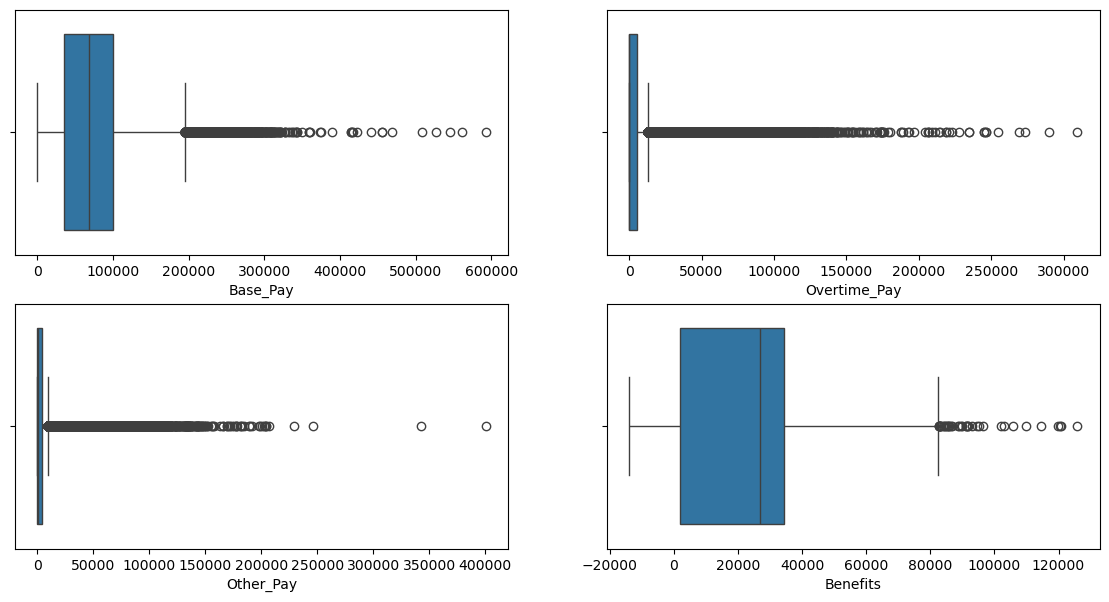

In [28]:
# Analysing employees base pay,overtime pay,other pay and benefits

plt.figure(figsize = (14,7))

plt.subplot(2,2,1)
sns.boxplot(x='Base_Pay',data = employee_pay_df)

plt.subplot(2,2,2)
sns.boxplot(x='Overtime_Pay',data = employee_pay_df)

plt.subplot(2,2,3)
sns.boxplot(x='Other_Pay',data = employee_pay_df)

plt.subplot(2,2,4)
sns.boxplot(x='Benefits',data = employee_pay_df)

plt.show()

* 75% of base pay is between 70000 and 200000.
* Overtime pay is very negligible to some of the employee.Some employee get overtime pay more than 30000.
* Other pay vary employee to employee. Some get 0 and some get more than 40000.
* Some employee are negatively benefitted with the benefit pay while some get hefty amount.

In [30]:
# Analysing top 10 average pay per job title

average_pay_jobtitle = employee_pay_df.groupby('Job_Title').agg(Average_pay = ('Total_Pay_Benefits','mean'))\
                                    .sort_values(by = 'Average_pay',ascending = False).reset_index(inplace=False).round(2)
average_pay_jobtitle[:10]

,Job_Title,Average_pay
0,Chief Investment Officer,611728.64
1,"Physician Administrator, Dph",454471.81
2,Managing Director,438767.56
3,"Chief, Fire Department",417767.86
4,General Manager-Metropolitan Transit Authority,399211.28
5,"Gen Mgr, Public Trnsp Dept",389126.94
6,Assistant Chief Of Police,387003.87
7,"Administrator, Dph",374311.56
8,Dept Head V,365736.80
9,"Dep Dir For Investments, Ret",355731.26


In [31]:
# Setting scientific notation to regular numbers

pd.set_option('display.float_format', '{:.2f}'.format)


# Analysing total pay per year

employee_pay_df.groupby('Year')['Total_Pay_Benefits'].sum()

Year
2011   2594195051.88
2012   3696940025.96
2013   3814636129.53
2014   3821866398.73
2015   4006678710.02
2016   4284701714.83
2017   4558432072.32
2018   4800888955.33
Name: Total_Pay_Benefits, dtype: float64

In [32]:
# Creating a column having extra pay

employee_pay_df['Total_Extra_Pay'] = employee_pay_df['Overtime_Pay'] + employee_pay_df['Other_Pay']
employee_pay_df

,Employee_Name,Job_Title,Base_Pay,Overtime_Pay,Other_Pay,Total_Pay_Without_Benefits,Benefits,Total_Pay_Benefits,Year,Total_Extra_Pay
0,Zykeill J Council,Public Service Trainee,35.00,0.00,0.00,35.00,0.35,35.35,2017,0.00
1,Zuzanna E Czerw,Publ Svc Aide-Asst To Prof,3558.46,0.00,0.00,3558.46,35.58,3594.04,2017,0.00
2,Zuzanna E Czerw,Publ Svc Aide-Asst To Prof,3298.78,0.00,0.00,3298.78,32.99,3331.77,2018,0.00
3,Zuri S Chavarin Cerda,Public Service Trainee,5857.19,0.00,0.00,5857.19,84.46,5941.65,2017,0.00
4,Zuri Jones,Deputy Probation Officer,70888.04,0.00,0.00,70888.04,0.00,70888.04,2011,0.00
...,...,...,...,...,...,...,...,...,...,...
312805,A Bernard Fatooh,Sheriff'S Property Keeper,26896.89,0.00,0.00,26896.89,6466.82,33363.71,2015,0.00
312806,A Bernard Fatooh,Sheriff'S Property Keeper,25896.17,0.00,0.00,25896.17,11698.73,37594.90,2016,0.00
312807,A Bernard Fatooh,Sheriff'S Property Keeper,29525.24,0.00,0.00,29525.24,6713.17,36238.41,2017,0.00
312808,A Bernard Fatooh,Sheriff'S Property Keeper,25232.90,0.00,0.00,25232.90,6037.79,31270.69,2018,0.00


In [33]:
# Creating correlation among numerical values for heat map

corr = employee_pay_df.corr(numeric_only = True)

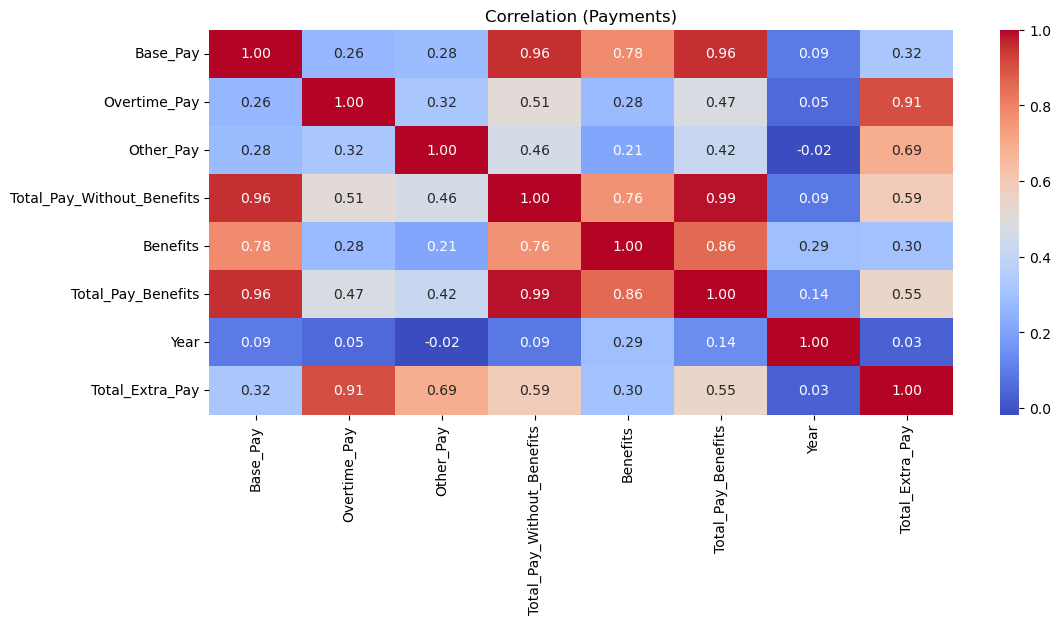

In [34]:
# Plotting heat map

plt.figure(figsize = (12,5))
sns.heatmap(corr,cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation (Payments)')
plt.show()

* Base pay has negligible correlation with year which means over the years there is negligible increase of basic payment.
* Overtime pay and Other pay are moderately coorelated to total pay benefits.
* Over the years payments of the employees has rarely been increased.

In [36]:
# Analysing average of base pay, pay without benefits and pay with benefits by Year

average_pay_year = employee_pay_df.groupby('Year')[['Base_Pay','Total_Pay_Without_Benefits','Benefits','Total_Pay_Benefits']].mean().sort_values(by = 'Year',ascending = True)
average_pay_year

,Base_Pay,Total_Pay_Without_Benefits,Benefits,Total_Pay_Benefits
Year,,,,
2011,63601.23,71750.06,0.00,71750.06
2012,65436.41,74113.26,26439.97,100553.23
2013,68516.06,77619.07,23831.32,101450.39
2014,66606.36,75519.40,24805.22,100324.62
2015,68785.03,77518.12,24220.72,101738.83
2016,71191.83,80526.93,24072.39,104599.31
2017,74581.43,84247.13,25438.67,109685.80
2018,76983.98,87223.55,26304.85,113528.40


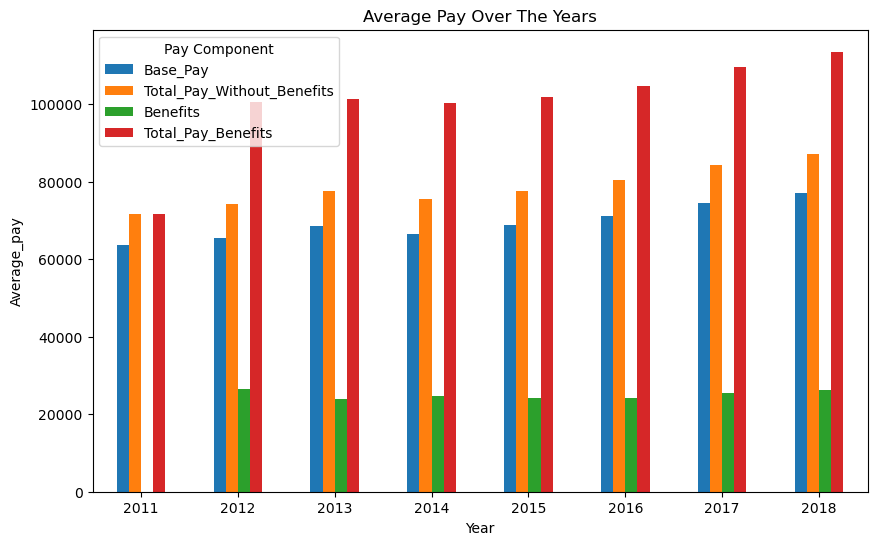

In [37]:
average_pay_year.plot(kind = 'bar', figsize = (10,6))

plt.title('Average Pay Over The Years')
plt.xlabel('Year')
plt.ylabel('Average_pay')
plt.xticks(rotation = 0)
plt.legend(title='Pay Component')
plt.show()

* Base pay have increased very less.
* Total pay without benefits have increased almost equally with Base pay.
* Benefits were raised from 2011 to 2012 but subsequent years it was constant.
* Total pay benefits were increased from 2011 to 2012 but subsequent years it increases slowly.

#### Analysing Mean And Median Pay Gap

In [40]:
# Analysing average pay for each year

mean_pay_year = employee_pay_df.groupby('Year')[['Total_Pay_Benefits']].mean().sort_values(by = 'Year',ascending = True).reset_index()
mean_pay_year.rename(columns = {'Total_Pay_Benefits':'Mean_Pay'},inplace = True)


# Analysing median pay for each year

median_pay_year = employee_pay_df.groupby('Year')[['Total_Pay_Benefits']].quantile(.50).sort_values(by = 'Year',ascending = True).reset_index()
median_pay_year.rename(columns = {'Total_Pay_Benefits':'Median_Pay'},inplace = True)


# Difference between mean pay and median pay per year

diff_df = pd.merge(mean_pay_year, median_pay_year, on = 'Year')

diff_df['Mean_Median_Pay_Gap'] = diff_df['Mean_Pay'] - diff_df['Median_Pay']

diff_df

,Year,Mean_Pay,Median_Pay,Mean_Median_Pay_Gap
0,2011,71750.06,68217.52,3532.53
1,2012,100553.23,101751.29,-1198.06
2,2013,101450.39,101978.36,-527.97
3,2014,100324.62,101155.39,-830.77
4,2015,101738.83,101170.84,567.99
5,2016,104599.31,103493.92,1105.39
6,2017,109685.80,108726.83,958.97
7,2018,113528.40,113296.88,231.52


* The above findings shows that there is some pay gap between median pay and the mean pay.
* 2012, 2013, 2014 have negative pay gap. That means mean pay is less than 50% of pay.
* 2011, 2015, 2016, 2017, 2018 have positive pay gap. That means mean pay is more than 50% of pay.

In [42]:
# Analysing average pay benefits of job title per year

pivot = pd.pivot_table(employee_pay_df, values = 'Total_Pay_Benefits', columns = 'Year', index = 'Job_Title',aggfunc = 'mean')
pivot

Year,2011,2012,2013,2014,2015,2016,2017,2018
Job_Title,,,,,,,,
Account Clerk,44035.66,69012.93,64175.40,55823.42,62683.05,66128.07,60579.91,74026.37
Accountant,47429.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accountant I,NaN,97296.57,94910.38,64178.33,52759.10,33548.99,27279.08,95255.30
Accountant Ii,NaN,92333.58,96492.60,96253.16,93497.98,87612.35,102007.03,103477.29
Accountant Ii (Ocii),NaN,NaN,NaN,NaN,89544.69,113139.77,84883.44,NaN
...,...,...,...,...,...,...,...,...
Worker'S Compensation Supervisor I,91020.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-Ray Laboratory Aide,52705.88,75778.31,64605.61,68754.12,8124.38,676.29,NaN,NaN
Youth Comm Advisor,NaN,85774.39,51344.31,52011.19,89105.32,95476.25,84077.85,59356.40


In [43]:
# Top 1% earners by years

top_1_percent_all_years = pd.DataFrame()

for year in employee_pay_df['Year'].unique():
    year_df = employee_pay_df[employee_pay_df['Year'] == year]
    
    # Calculate 99th percentile threshold for Total_Pay_Benefits
    threshold = year_df['Total_Pay_Benefits'].quantile(0.99)
    
    # Filter employees who are above this threshold
    top_earners = year_df[year_df['Total_Pay_Benefits'] > threshold].copy()
    
    # Add to final DataFrame
    top_1_percent_all_years = pd.concat([top_1_percent_all_years, top_earners])

top_1_percent_all_years.reset_index(drop=True, inplace=True)

In [44]:
top_1_percent_all_years

,Employee_Name,Job_Title,Base_Pay,Overtime_Pay,Other_Pay,Total_Pay_Without_Benefits,Benefits,Total_Pay_Benefits,Year,Total_Extra_Pay
0,Zhi Jiar Zhuang,Senior Physician Specialist,238424.00,0.00,13121.20,251545.20,65367.96,316913.16,2017,13121.20
1,Zachary W Pumphrey,"Battalion Chief, Fire Suppress",186611.62,30577.89,25964.32,243153.83,56007.79,299161.62,2017,56542.21
2,Yifang Qian,Senior Physician Specialist,245512.00,0.00,119866.80,365378.80,71393.73,436772.53,2017,119866.80
3,Yeva M Johnson,Senior Physician Specialist,253134.02,0.00,1560.00,254694.02,65889.54,320583.56,2017,1560.00
4,Yee Bun B Lui,Supervising Physician Spec,243733.50,0.00,4850.00,248583.50,63574.63,312158.13,2017,4850.00
...,...,...,...,...,...,...,...,...,...,...
3125,Albert Yu,Manager Viii,211220.48,0.00,10555.00,221775.48,54550.48,276325.96,2013,10555.00
3126,Alan L Harvey,Firefighter,116956.72,106220.10,28071.73,251248.55,43336.09,294584.64,2013,134291.83
3127,Ai Kyung Chung,Anesthetist,230943.59,4549.33,9836.61,245329.53,65149.75,310479.28,2013,14385.94
3128,Adrienne Sims,Firefighter,115893.46,98593.84,20599.37,235086.67,41842.61,276929.28,2013,119193.21


### Analysis

* Data is highly right skewed with respect to Total Pay Benefits.
* Very less number of employees are getting high amount of total pay benefits that is around 0.65%.
* Large number of employees that is around 75% are getting pay benefits between 50000 and 300000.
* There are only 131 unique high paying job titles as compared to median paying jobs.
* There are 1676 unique median paying job titles. Most of the employees are working in these median jobs.
* 75% of base pay is between 70000 and 200000.
* Additional income which is Overtime pay and Other pay are not evenly paid.
* There is good income desparity if total benefit pay is considered.
* Base pay has been stagnant over the years.
* 2012, 2013, 2014 have negative pay gap. That means That means average pay is less than 50% of pay.
* 2011, 2015, 2016, 2017, 2018 have positive pay gap. That means average pay is more than 50% of pay.
* Over the years employees are working with the same salary for these 8 years.



